In [1]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from zipfile import ZipFile
import cv2
import random
from tqdm import tqdm
from glob import glob
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from numpy import *
from PIL import Image

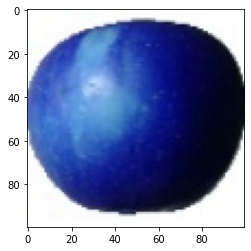

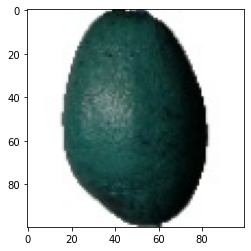

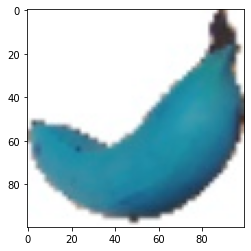

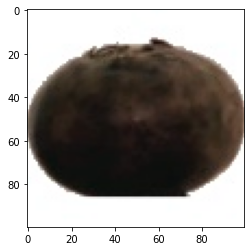

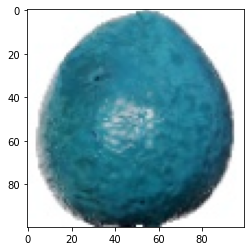

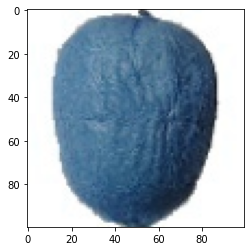

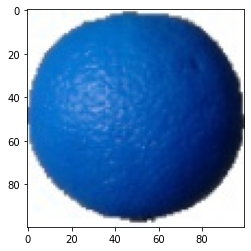

In [2]:
#loading images from path
DATADIR = 'D:/archivefruit/fruits-360_dataset/fruits-360/Training'
CATEGORIES = ["Apple Braeburn","Avocado","Banana","Blueberry","Guava","Kiwi","Orange"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #,cv2.IMREAD_GRAYSCALE
        plt.imshow(img_array)
        plt.show()
        break
   # break

In [10]:
#building our training data
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do fruits

        path = os.path.join(DATADIR,category)  # create path to fruits
        class_num = CATEGORIES.index(category)  # get the classification  (0 ,1,2,3,4,5,6) different number donate different category of fruit

        for img in tqdm(os.listdir(path)):  # iterate over each image per fruits
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass        

create_training_data()

image_count = len(training_data)

100%|██████████| 479/479 [00:00<00:00, 733.62it/s]


In [11]:
print(image_count)

3306


In [12]:
#shuffle the dataset
random.shuffle(training_data)

In [13]:
for sample in training_data[:10]:
    print(sample[1])

3
1
2
3
5
1
4
2
1
0


In [14]:
IMG_SIZE = 100
batch_size = 100
img_height = 100
img_width = 100

In [15]:
#Assigning labels and features
X =[]
y =[]
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [16]:
#creating own model
#Normalising X and converting labels to categorical data
X = X.astype('float32')
X /= 255
Y = np_utils.to_categorical(y,7)
print(Y[100])
print(shape(Y))

[1. 0. 0. 0. 0. 0. 0.]
(3306, 7)


In [17]:
X = np.array(X)
print(type(X))

<class 'numpy.ndarray'>


In [18]:
y=np.array(y)
print(type(y))

<class 'numpy.ndarray'>


In [19]:
#split X and Y for use in CNN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [20]:
#define compare and train the CNN model
batch_size = 128
nb_classes =7
nb_epochs = 5
img_rows, img_columns = 100, 100
img_channel = 3
nb_filters = 384
nb_pool = 4
nb_conv = 5

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(96, (3,3), padding='same', activation=tf.nn.relu,input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=3),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=3),
    tf.keras.layers.Conv2D(384, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=3),
    tf.keras.layers.Conv2D(384, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=3),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(7,  activation=tf.nn.softmax)
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 96)      960       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 33, 33, 256)       221440    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 384)       885120    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 384)        0

In [32]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = batch_size,verbose=1, epochs = 5,validation_split = 0.3, callbacks=[tf.keras.callbacks.CSVLogger('his.csv')])


Epoch 1/5
13/13 [==============================] - 128s 9s/step - loss: 0.3520 - accuracy: 0.8956 - val_loss: 0.1187 - val_accuracy: 0.9755
Epoch 2/5
13/13 [==============================] - 119s 9s/step - loss: 0.1315 - accuracy: 0.9537 - val_loss: 0.0461 - val_accuracy: 0.9942
Epoch 3/5
13/13 [==============================] - 123s 9s/step - loss: 0.0513 - accuracy: 0.9889 - val_loss: 0.0266 - val_accuracy: 0.9914
Epoch 4/5
13/13 [==============================] - 116s 9s/step - loss: 0.0275 - accuracy: 0.9926 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 5/5
13/13 [==============================] - 112s 9s/step - loss: 0.0218 - accuracy: 0.9944 - val_loss: 0.0265 - val_accuracy: 0.9885


In [33]:
#Evaluate the Model
history = pd.read_csv('his.csv') 
history.head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.895615,0.352032,0.975540,0.118684
1,1,0.953675,0.131522,0.994245,0.046054
2,2,0.988882,0.051255,0.991367,0.026601
3,3,0.992588,0.027514,1.000000,0.005626
4,4,0.994441,0.021759,0.988489,0.026504


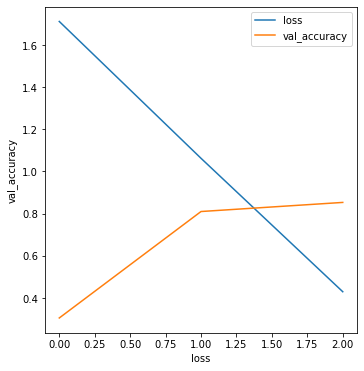

In [25]:
plt.figure(figsize=(19,6))
plt.subplot(131)
plt.plot(history.epoch, history.loss, label="loss")
plt.plot(history.epoch, history.val_accuracy, label="val_accuracy")
plt.xlabel('loss')
plt.ylabel('val_accuracy')
plt.legend()

In [30]:
#Accuracy and Score of model
score = model.evaluate(X_test, y_test, verbose = 1 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1]*100,'%')

31/31 [==============================] - 9s 273ms/step - loss: 0.2779 - accuracy: 0.8407
Test Score:  0.2778697907924652
Test accuracy:  84.07257795333862 %


In [27]:
#observing its classification report and confusion matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#predict
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

31/31 [==============================] - 11s 342ms/step


In [28]:
#get classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       174
           1       0.94      1.00      0.97       116
           2       1.00      1.00      1.00       146
           3       1.00      1.00      1.00       140
           4       0.04      1.00      0.08         6
           5       1.00      0.47      0.64       278
           6       0.97      1.00      0.99       132

    accuracy                           0.84       992
   macro avg       0.85      0.92      0.81       992
weighted avg       0.98      0.84      0.88       992



In [29]:
#get confusion matrix
print(confusion_matrix(y_pred,y_test))

[[163   8   0   0   0   0   3]
 [  0 116   0   0   0   0   0]
 [  0   0 146   0   0   0   0]
 [  0   0   0 140   0   0   0]
 [  0   0   0   0   6   0   0]
 [  0   0   0   0 146 131   1]
 [  0   0   0   0   0   0 132]]


train_data = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

In [ ]:
#Tensorflow image classification

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
DATADIR = 'D:/archivefruit/fruits-360_dataset/fruits-360/Training'
CATEGORIES = ["Apple Braeburn","Avocado","Banana","Blueberry","Guava","Kiwi","Orange"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do fruits

        path = os.path.join(DATADIR,category)  # create path to fruits
        class_num = CATEGORIES.index(category)  # get the classification  (0 ,1,2,3,4,5,6). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))
        

print(len(training_data))

import random
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

#creating own model
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

#We can always load it in to our current script, or a totally new one by doing:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

#at 16,Let's save this data, so that we don't need to keep calculating it every time we want to play with the neural network model:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
We can always load it in to our current script, or a totally new one by doing:

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
#Now that we've got out dataset, we're ready to cover convolutional neural networks and implement one with our data for classification.